In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [3]:
import pandas as pd

In [4]:
# importing the pandas library
import pandas as pd

# reading the csv file
df = pd.read_csv('IMDB_Dataset.csv')

# updating the column value/data
df['sentiment'] = df['sentiment'].replace({'negative': 0})

# writing into the file
df.to_csv('IMDB_Dataset.csv', index=False)

print(df)


                                                  review  sentiment
0      One of the other reviewers has mentioned that ...          1
1      A wonderful little production. <br /><br />The...          1
2      I thought this was a wonderful way to spend ti...          1
3      Basically there's a family where a little boy ...          0
4      Petter Mattei's "Love in the Time of Money" is...          1
...                                                  ...        ...
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taught in parochial elementary...          0
49998  I'm going to have to disagree with the previou...          0
49999  No one expects the Star Trek movies to be high...          0

[50000 rows x 2 columns]


In [6]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('IMDB_Dataset.csv')
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('train-imdb.csv', index=False)
test.to_csv('test-imdb.csv', index=False)

In [7]:
train_df = pd.read_csv("train-imdb.csv", encoding='unicode_escape', header=0)

In [8]:
train_df

,review,sentiment
0,"Ok, so it borrows a little from ""It's a Wonder...",1
1,The whole exercise is pointless. Why make the ...,0
2,Frankly I'm amazed to see that this movie is g...,0
3,This is one of the best made movies from 2002....,1
4,"I mean of all the obscure, overlooked, low bud...",0
...,...,...
44995,Once again Mr. Costner has dragged out a movie...,0
44996,Stephen J. Cannell apparently decided a few ye...,0
44997,1981's Just Before Dawn is one of the best tal...,1
44998,"This show is good. I like the acting, funny bi...",1


In [9]:
train_df.iloc[0][1]

C:\Users\huyen\AppData\Local\Temp\ipykernel_13296\1864895821.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_df.iloc[0][1]


1

In [10]:
test_df = pd.read_csv("test-imdb.csv", encoding='unicode_escape', header=0)

In [11]:
test_df.shape

(5000, 2)

In [12]:
test_df.head()

,review,sentiment
0,"This show was an amazing, fresh & innovative i...",0
1,This movie made it into one of my top 10 most ...,0
2,"""Ardh Satya"" is one of the finest film ever ma...",1
3,Preston Sturgis' THE POWER AND THE GLORY was u...,1
4,Bela Lugosi appeared in several of these low b...,1


In [13]:
train_df['sentiment'] = (train_df['sentiment']==1).astype(int)
test_df['sentiment'] = (test_df['sentiment']==1).astype(int)

train_df.head(30)

,review,sentiment
0,"Ok, so it borrows a little from ""It's a Wonder...",1
1,The whole exercise is pointless. Why make the ...,0
2,Frankly I'm amazed to see that this movie is g...,0
3,This is one of the best made movies from 2002....,1
4,"I mean of all the obscure, overlooked, low bud...",0
5,"This show is quick-witted, colorful, dark yet ...",1
6,The final chapter in the Hanzo the Razor trilo...,1
7,Overall an extremely disappointing picture. Ve...,0
8,The Andrew Davies adaptation of the Sarah Wate...,1
9,This TV adaptation of Sarah Waters' novel was ...,1


In [14]:
test_df.head()

,review,sentiment
0,"This show was an amazing, fresh & innovative i...",0
1,This movie made it into one of my top 10 most ...,0
2,"""Ardh Satya"" is one of the finest film ever ma...",1
3,Preston Sturgis' THE POWER AND THE GLORY was u...,1
4,Bela Lugosi appeared in several of these low b...,1


In [15]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,1,"Ok, so it borrows a little from ""It's a Wonder..."
1,1,0,The whole exercise is pointless. Why make the ...
2,2,0,Frankly I'm amazed to see that this movie is g...
3,3,1,This is one of the best made movies from 2002....
4,4,0,"I mean of all the obscure, overlooked, low bud..."


In [16]:
train_df_bert

,id,label,sentence
0,0,1,"Ok, so it borrows a little from ""It's a Wonder..."
1,1,0,The whole exercise is pointless. Why make the ...
2,2,0,Frankly I'm amazed to see that this movie is g...
3,3,1,This is one of the best made movies from 2002....
4,4,0,"I mean of all the obscure, overlooked, low bud..."
...,...,...,...
44995,44995,0,Once again Mr. Costner has dragged out a movie...
44996,44996,0,Stephen J. Cannell apparently decided a few ye...
44997,44997,1,1981's Just Before Dawn is one of the best tal...
44998,44998,1,"This show is good. I like the acting, funny bi..."


In [17]:
train_df_bert = train_df_bert.iloc[0:10000]

In [18]:
train_df_bert

,id,label,sentence
0,0,1,"Ok, so it borrows a little from ""It's a Wonder..."
1,1,0,The whole exercise is pointless. Why make the ...
2,2,0,Frankly I'm amazed to see that this movie is g...
3,3,1,This is one of the best made movies from 2002....
4,4,0,"I mean of all the obscure, overlooked, low bud..."
...,...,...,...
9995,9995,1,The title of my summary pretty much covers my ...
9996,9996,1,This is the kind of movie the US doesn't make....
9997,9997,0,first of all let's start out by saying that Ro...
9998,9998,1,This thriller is one of the few (film) surpris...


In [19]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,0,"This show was an amazing, fresh & innovative i..."
1,1,0,This movie made it into one of my top 10 most ...
2,2,1,"""Ardh Satya"" is one of the finest film ever ma..."
3,3,1,Preston Sturgis' THE POWER AND THE GLORY was u...
4,4,1,Bela Lugosi appeared in several of these low b...


In [20]:
test_df_bert = test_df_bert.iloc[0:3000]

In [21]:
test_df_bert

,id,label,sentence
0,0,0,"This show was an amazing, fresh & innovative i..."
1,1,0,This movie made it into one of my top 10 most ...
2,2,1,"""Ardh Satya"" is one of the finest film ever ma..."
3,3,1,Preston Sturgis' THE POWER AND THE GLORY was u...
4,4,1,Bela Lugosi appeared in several of these low b...
...,...,...,...
2995,2995,1,I remember liking this more than Nausicaa of t...
2996,2996,1,"stars: Julianna Donald, Lonny Price and Louis ..."
2997,2997,1,"This is a beautiful, rich, and very well-execu..."
2998,2998,0,I am amazed at the amount of praise that is he...


In [22]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [23]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [24]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [25]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  The whole exercise is pointless. Why make the film at all? The lighting is ghastly, but the sound is just a joke. Like a high-school production. Whoever put the budget together for this film should be drawn and quartered for allowing it to be made without the proper budget for soundmen with equipment fit for recording.<br /><br />So much dialog is unintelligible due to losses in echo or the lack of proximity to the mic. Economy should have been made on any other area. The whole production is lifeless and just LAME with such amateurish half-arsed production. It lacks warmth, clarity, and has no design to it.
Tokenized:  ['the', 'whole', 'exercise', 'is', 'pointless', '.', 'why', 'make', 'the', 'film', 'at', 'all', '?', 'the', 'lighting', 'is', 'g', '##has', '##tly', ',', 'but', 'the', 'sound', 'is', 'just', 'a', 'joke', '.', 'like', 'a', 'high', '-', 'school', 'production', '.', 'whoever', 'put', 'the', 'budget', 'together', 'for', 'this', 'film', 'should', 'be', 'drawn', 'a

In [26]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  231


In [27]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  207


In [28]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 300,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  Ok, so it borrows a little from "It's a Wonderful Life", but that was 44 years prior to this film, so why not a new attempt. Belushi is having a rotten 35th birthday. He didn't get his Wheaties, his coffee, and has lost his job. The capper is when his self described "big blue piece of sh**" car breaks down at the end of the day. He heads into an empty bar to call for a tow. While waiting, he's recognized by the bartender (Caine) as the kid who lost the town's championship baseball game 20 years earlier. This gets him to thinking how life would've been if he had won the game. He finds out when, unbeknownst to him, Caine serves up a motion potion in a glass that gives him a mansion, the prom queen (Russo) as his wife, and makes him president of the sporting goods company he's been canned from. Caine later reveals himself as the one who's responsible for this change, but Belushi is not entirely on board. He never fully adjusts, and in a plot development that doesn't kill the mo

In [29]:

train_df_bert.head()

,id,label,sentence
0,0,1,"Ok, so it borrows a little from ""It's a Wonder..."
1,1,0,The whole exercise is pointless. Why make the ...
2,2,0,Frankly I'm amazed to see that this movie is g...
3,3,1,This is one of the best made movies from 2002....
4,4,0,"I mean of all the obscure, overlooked, low bud..."


In [30]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [31]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [32]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 60)
X_test shape: (3000, 60)


In [33]:

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 40
nb_classes = 2
#input_shape=x_train.shape
model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 32)            64000     
_________________________________________________________________
conv1d (Conv1D)              (None, 60, 32)            5152      
_________________________________________________________________
dropout (Dropout)            (None, 60, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 32)            4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 60, 32)            3104      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 3

In [34]:
import numpy
import keras
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
900/900 [==============================] - 16s 12ms/step - loss: 0.5330 - accuracy: 0.7118 - val_loss: 0.4758 - val_accuracy: 0.7710
Epoch 2/20
900/900 [==============================] - 11s 12ms/step - loss: 0.3583 - accuracy: 0.8442 - val_loss: 0.4748 - val_accuracy: 0.7840
Epoch 3/20
900/900 [==============================] - 11s 12ms/step - loss: 0.2909 - accuracy: 0.8796 - val_loss: 0.4789 - val_accuracy: 0.7830
Epoch 4/20
900/900 [==============================] - 10s 12ms/step - loss: 0.2383 - accuracy: 0.9053 - val_loss: 0.4937 - val_accuracy: 0.7930
Epoch 5/20
313/313 [==============================] - 3s 6ms/step - loss: 0.1598 - accuracy: 0.9503
Training Accuracy: 0.950300
Training Loss: 0.159828
94/94 [==============================] - 1s 7ms/step - loss: 0.5674 - accuracy: 0.8037
Testing Accuracy:  0.803667
Testing Loss:  0.567437


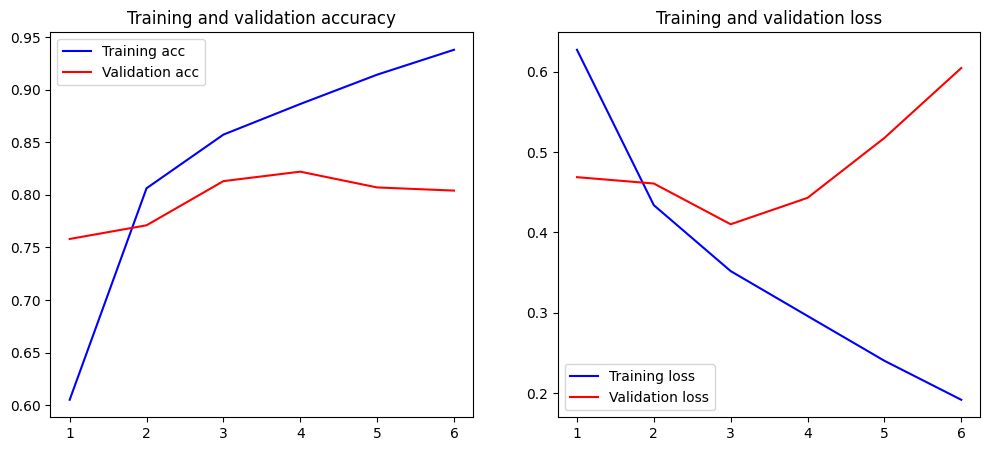

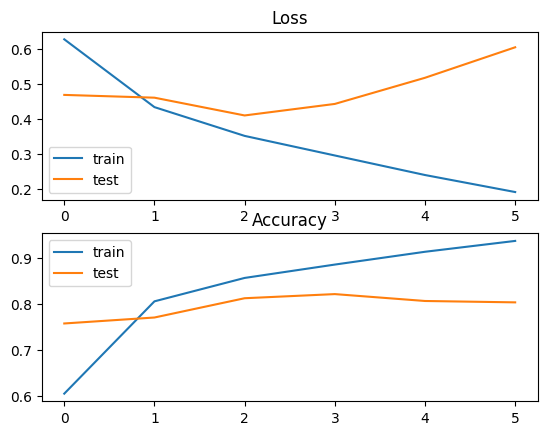

In [221]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()